# Portugues Final Grade Prediction

The goal of the following work is to train some machine learning models in order to predict the final portuguese grade of students attending two schools in Portugal. In the portuguese scholar system the grades are between 0 and 20, following this hierarchy (https://en.wikipedia.org/wiki/Academic_grading_in_Portugal): <br>

|   Grade	|   Qualification	|  
|---	|---	|
|  20-17.5 	|   Excellent	|  
|   17.4-15.5		|   Very good	|   	
|   15.4-13.5	|   Good	|  
|   13.4-9.5		|   Sufficient	| 
|   9.4-3.5		|   Weak	| 
|   3.4-0		|   Poor	| 

Furthermore the school year is divided into three parts, and in the end of all of them the students reiceve a grade. In the used dataset (https://www.kaggle.com/datasets/uciml/student-alcohol-consumption) all of the three grades are reported, but we only focused on the final grade, i.e. G3. <br> <br>
The work is organized as follows: <br>
1) First of all an exploratory data analysis (EDA) of the considered dataset is provided. In particular, the EDA is mainly focused on the label, namely the final portuguese grade (G3), but other insights from the data are also took into account. <br><br>
2) Second of all the machine learning models are trained on an appropriately training set. All the considered models have one or more hyperparameters, which are tuned thanks to a cross validation procedure. In specific, the machine learning models which have been considered are: <br>
* K-Nearest Neighbors (KNN) <br>
* Decision Tree (DT) <br>
* Lasso Regression (Lasso) <br>
* Support Vector Regressor (SVR) <br>
* Random Forest (RF)<br><br> 

3) After that, the trained models are tested on the test set and the best models are choosen. The latter results to be Support Vector Regressor (SVR) and Random Forest (RF). Then a plot containing the real values and the predicted values is made, and the latter furnishes us an insight concerning the builded machine learning models. After that an analysis on the distribution of the errors commited by the two models is made, and the latter provides us a discriminant to choose between one of the two models. Lastly, a plot containing the most 'predictive' features is provided. <br><br>

Here there is a prospectus of all the features into the dataset: <br>

|   Variable name	|   Variable description	|   Type	|   Values	|
|---	|---	|---	|---	|
|   school	|  student's school 	|  categorical 	|   'GP' - Gabriel Pereira  <br>'MS' - Mousinho da Silveira	|
|   sex 	|   student's sex	|   categorical	|   'F' - female  '<br> M' - male	|
|   age	|   student's age	|   integer	|  from 15 to 22 	|
|  address 	|   student's home address type	|   categorical	|   'U' - urban <br> 'R' - rural	|
|   famsize	|   family size	|   categorical	|  'LE3' - less or equal to 3 <br> 'GT3' - greater than 3 	|
|   Pstatus	|   parent's cohabitation status	|  categorical 	|  'T' - living together <br> 'A' - apart 	|
|   Medu	|   mother's education	|  integer 	| 0 - none <br> 1 - primary education (4th grade) <br> 2 – 5th to 9th grade <br> 3 – secondary education  <br> 4 – higher education  	|
|   Fedu	|   father's education	|   integer	| 0 - none <br> 1 - primary education (4th grade) <br> 2 – 5th to 9th grade <br> 3 – secondary education  <br> 4 – higher education  |
|   Mjob	|   mother's job	|   categorical	|  'teacher' <br> 'health' care related <br>civil 'services' (e.g. administrative or police) <br> 'at_home' or 'other')	|
|   Fjob	|   father's job	|   categorical	|   'teacher' <br> 'health' care related <br>civil 'services' (e.g. administrative or police) <br> 'at_home' or 'other')		|
|   reason	|   reason to choose this school	|   categorical	|   close to 'home' <br> school 'reputation' <br> 'course' preference <br> 'other'	|
|  guardian 	|   student's guardian	|  categorical 	|   'mother' <br>'father' <br> 'other'	|
|   traveltime	|   home to school travel time	|   integer	|   1 - <15 min. <br> 2 - 15 to 30 min. <br> 3 - 30 min. to 1 hour <br> 4 - >1 hour	|
|  studytime 	|  weekly study time 	|   integer	|   1 - <2 hours <br> 2 - 2 to 5 hours <br> 3 - 5 to 10 hours <br> 4 - >10 hours	|
|   failures	|  number of past class failures 	|  integer 	|   n if 1<=n<3, else 4	|
|  schoolsup 	|   extra educational support	|   categorical	|  yes or no 	|
|   famsup	|   family educational support	|    categorical	|   yes or no	|
|   paid	|   extra paid classes within the course subject (Math or Portuguese) 	|   categorical 	|   yes or no	|
|   activities	|   extra-curricular activities	|    categorical	|   yes or no	|
|   nursery	|  attended nursery school 	|    categorical	| yes or no  	|
|   higher 	|  wants to take higher education 	|   categorical 	|   yes or no	|
|   internet	|   Internet access at home	|    categorical	|   yes or no	|
|   romantic	|   with a romantic relationship	|   categorical 	|   yes or no	|
|   famrel	|   quality of family relationships	|   integer	|   from 1 - very bad to 5 - excellent	|
|   freetime	|   free time after school	|   integer	|   from 1 - very low to 5 - very high	|
|   goout	|   going out with friends	|   integer	|   from 1 - very low to 5 - very high	|
|   Dalc	|   workday alcohol consumption	|   integer	|   from 1 - very low to 5 - very high	|
|   Walc	|   weekend alcohol consumption	|   integer	|   from 1 - very low to 5 - very high	|
|   health	|  current health status 	|   integer	|   from 1 - very bad to 5 - very good	|
|   absences	|   number of school absences	|   integer	|   from 0 to 93	|


In [1]:
# Standard Libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# ML standard libraries
from sklearn.preprocessing import MinMaxScaler as scaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error as MAE 
from sklearn.model_selection import RandomizedSearchCV as RSCV 

# Models 
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.tree import DecisionTreeRegressor as DT 
from sklearn.linear_model import Lasso
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor as RF 

# for avoiding warnings 
import warnings 
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [2]:
# I load the dataset
df=pd.read_csv('student-por.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

# EDA 

In [4]:
# I rename some columns values in order to make the plot visualization cleaner 
D= {'address': {'U':'Urban', 'R':'Rural'},
           'famsize': {'LE3':'Less then 3', 'GT3':'Greater then 3'},
           'Pstatus': {'T':'Together', 'A':'Apart'}}

for column in list(D.keys()):
    df[column] = df[column].map(D[column])

In [5]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,Urban,Greater then 3,Apart,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,Urban,Greater then 3,Together,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,Urban,Less then 3,Together,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,Urban,Greater then 3,Together,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,Urban,Greater then 3,Together,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,Rural,Greater then 3,Together,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,Urban,Less then 3,Together,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,Urban,Greater then 3,Together,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,Urban,Less then 3,Together,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Let us start to plot some pie plots for categorical data

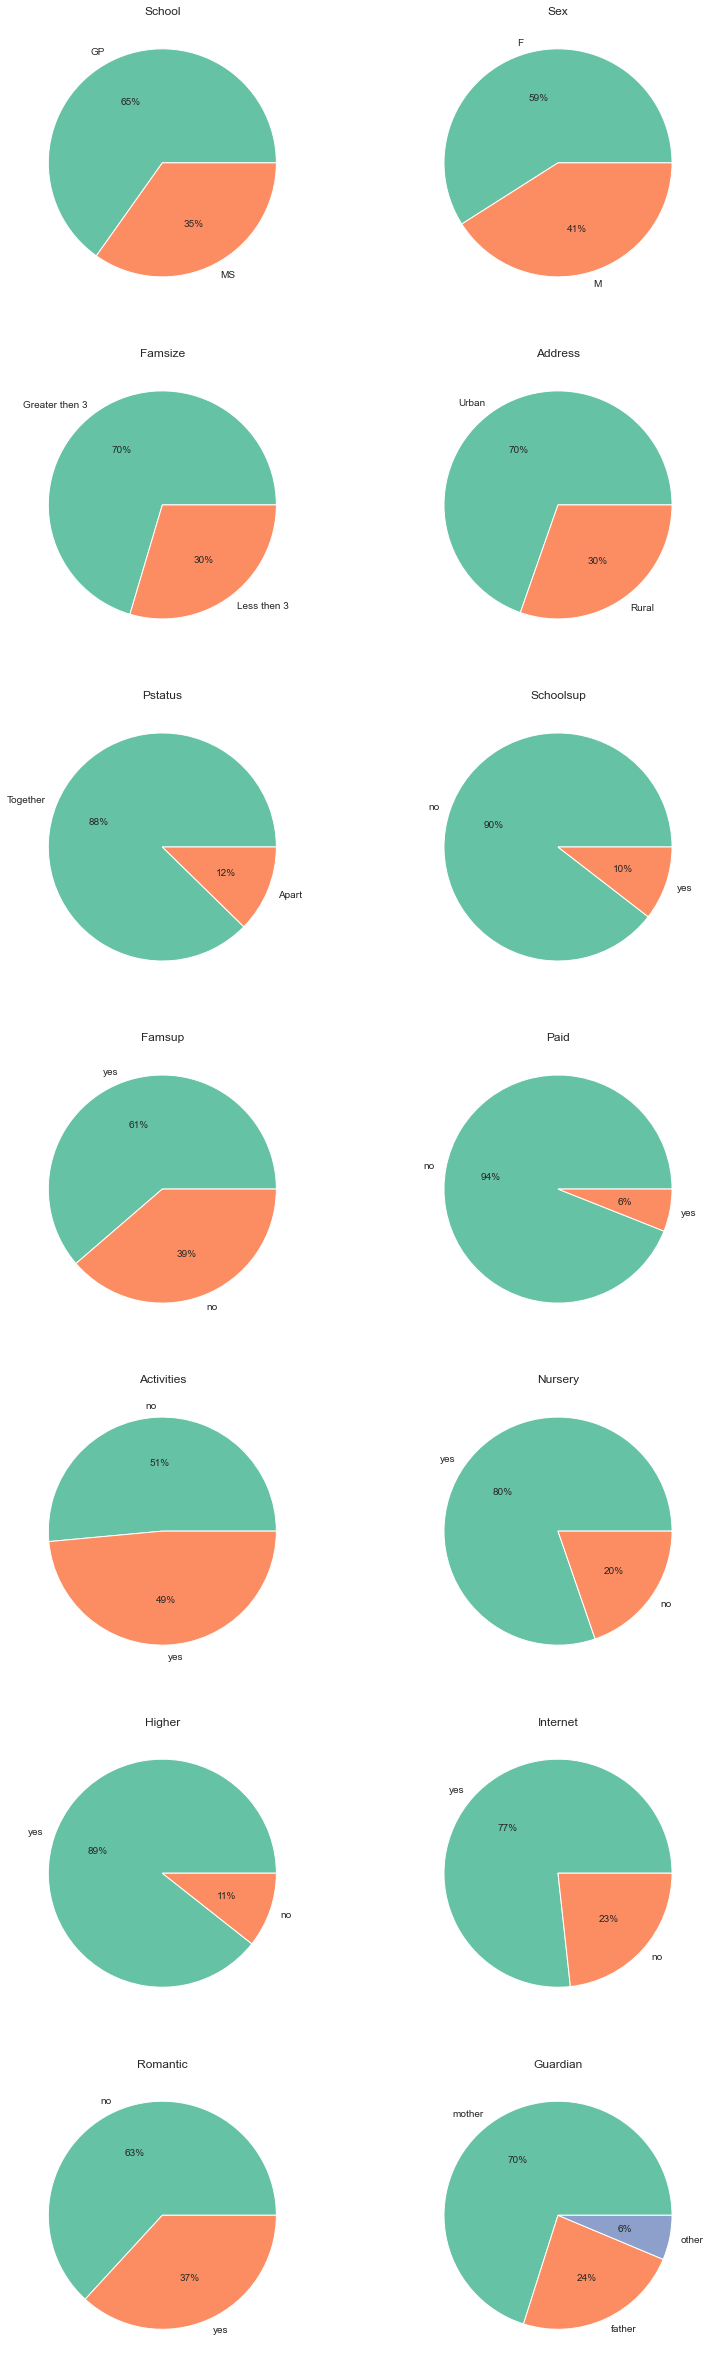

In [6]:
categorical=['school','sex','famsize','address','Pstatus','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic','guardian']

f, axes=plt.subplots(7,2,figsize=(13,43))
for i,feature in enumerate(categorical):
    plt.subplot(7,2,i+1)
    plt.pie(df[feature].value_counts(),
       labels=df[feature].value_counts().index,
       autopct='%.0f%%',
       colors=sns.color_palette('Set2'))
    plt.title(feature.capitalize())
plt.show()

Let us observe the distributions of the three grades G1, G2 and G3 and the correlation between them thanks to the following plot:

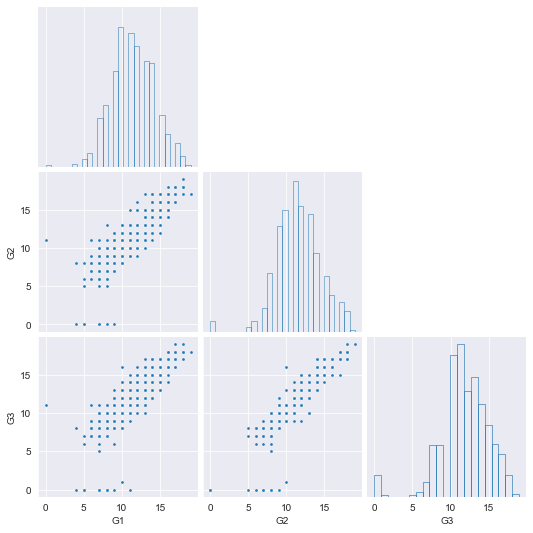

In [7]:
cols=['G1', 'G2', 'G3']
sns.pairplot(df[cols],
             corner=True,
             diag_kws={'fill': False},
             plot_kws={'s': 9})

plt.show()

### As we may see there is a strong positive linear correlation between the grades. In order to predict the final grade G3 the other grades G1 and G2  should be one of most important features. However, the scope of this work is try to predict the final grade G3 thanks to the informations concerning the social and personal situation of the student, namely we are not going to use the other grades as features. 

Thus, I drop the columns G1 and G2:

In [8]:
df.drop(['G1', 'G2'], axis=1, inplace=True)

# G3 

Let us focus on G3. In particular, we want to show which variables influence the latter the most. Let us start to replot the distribution of G3:

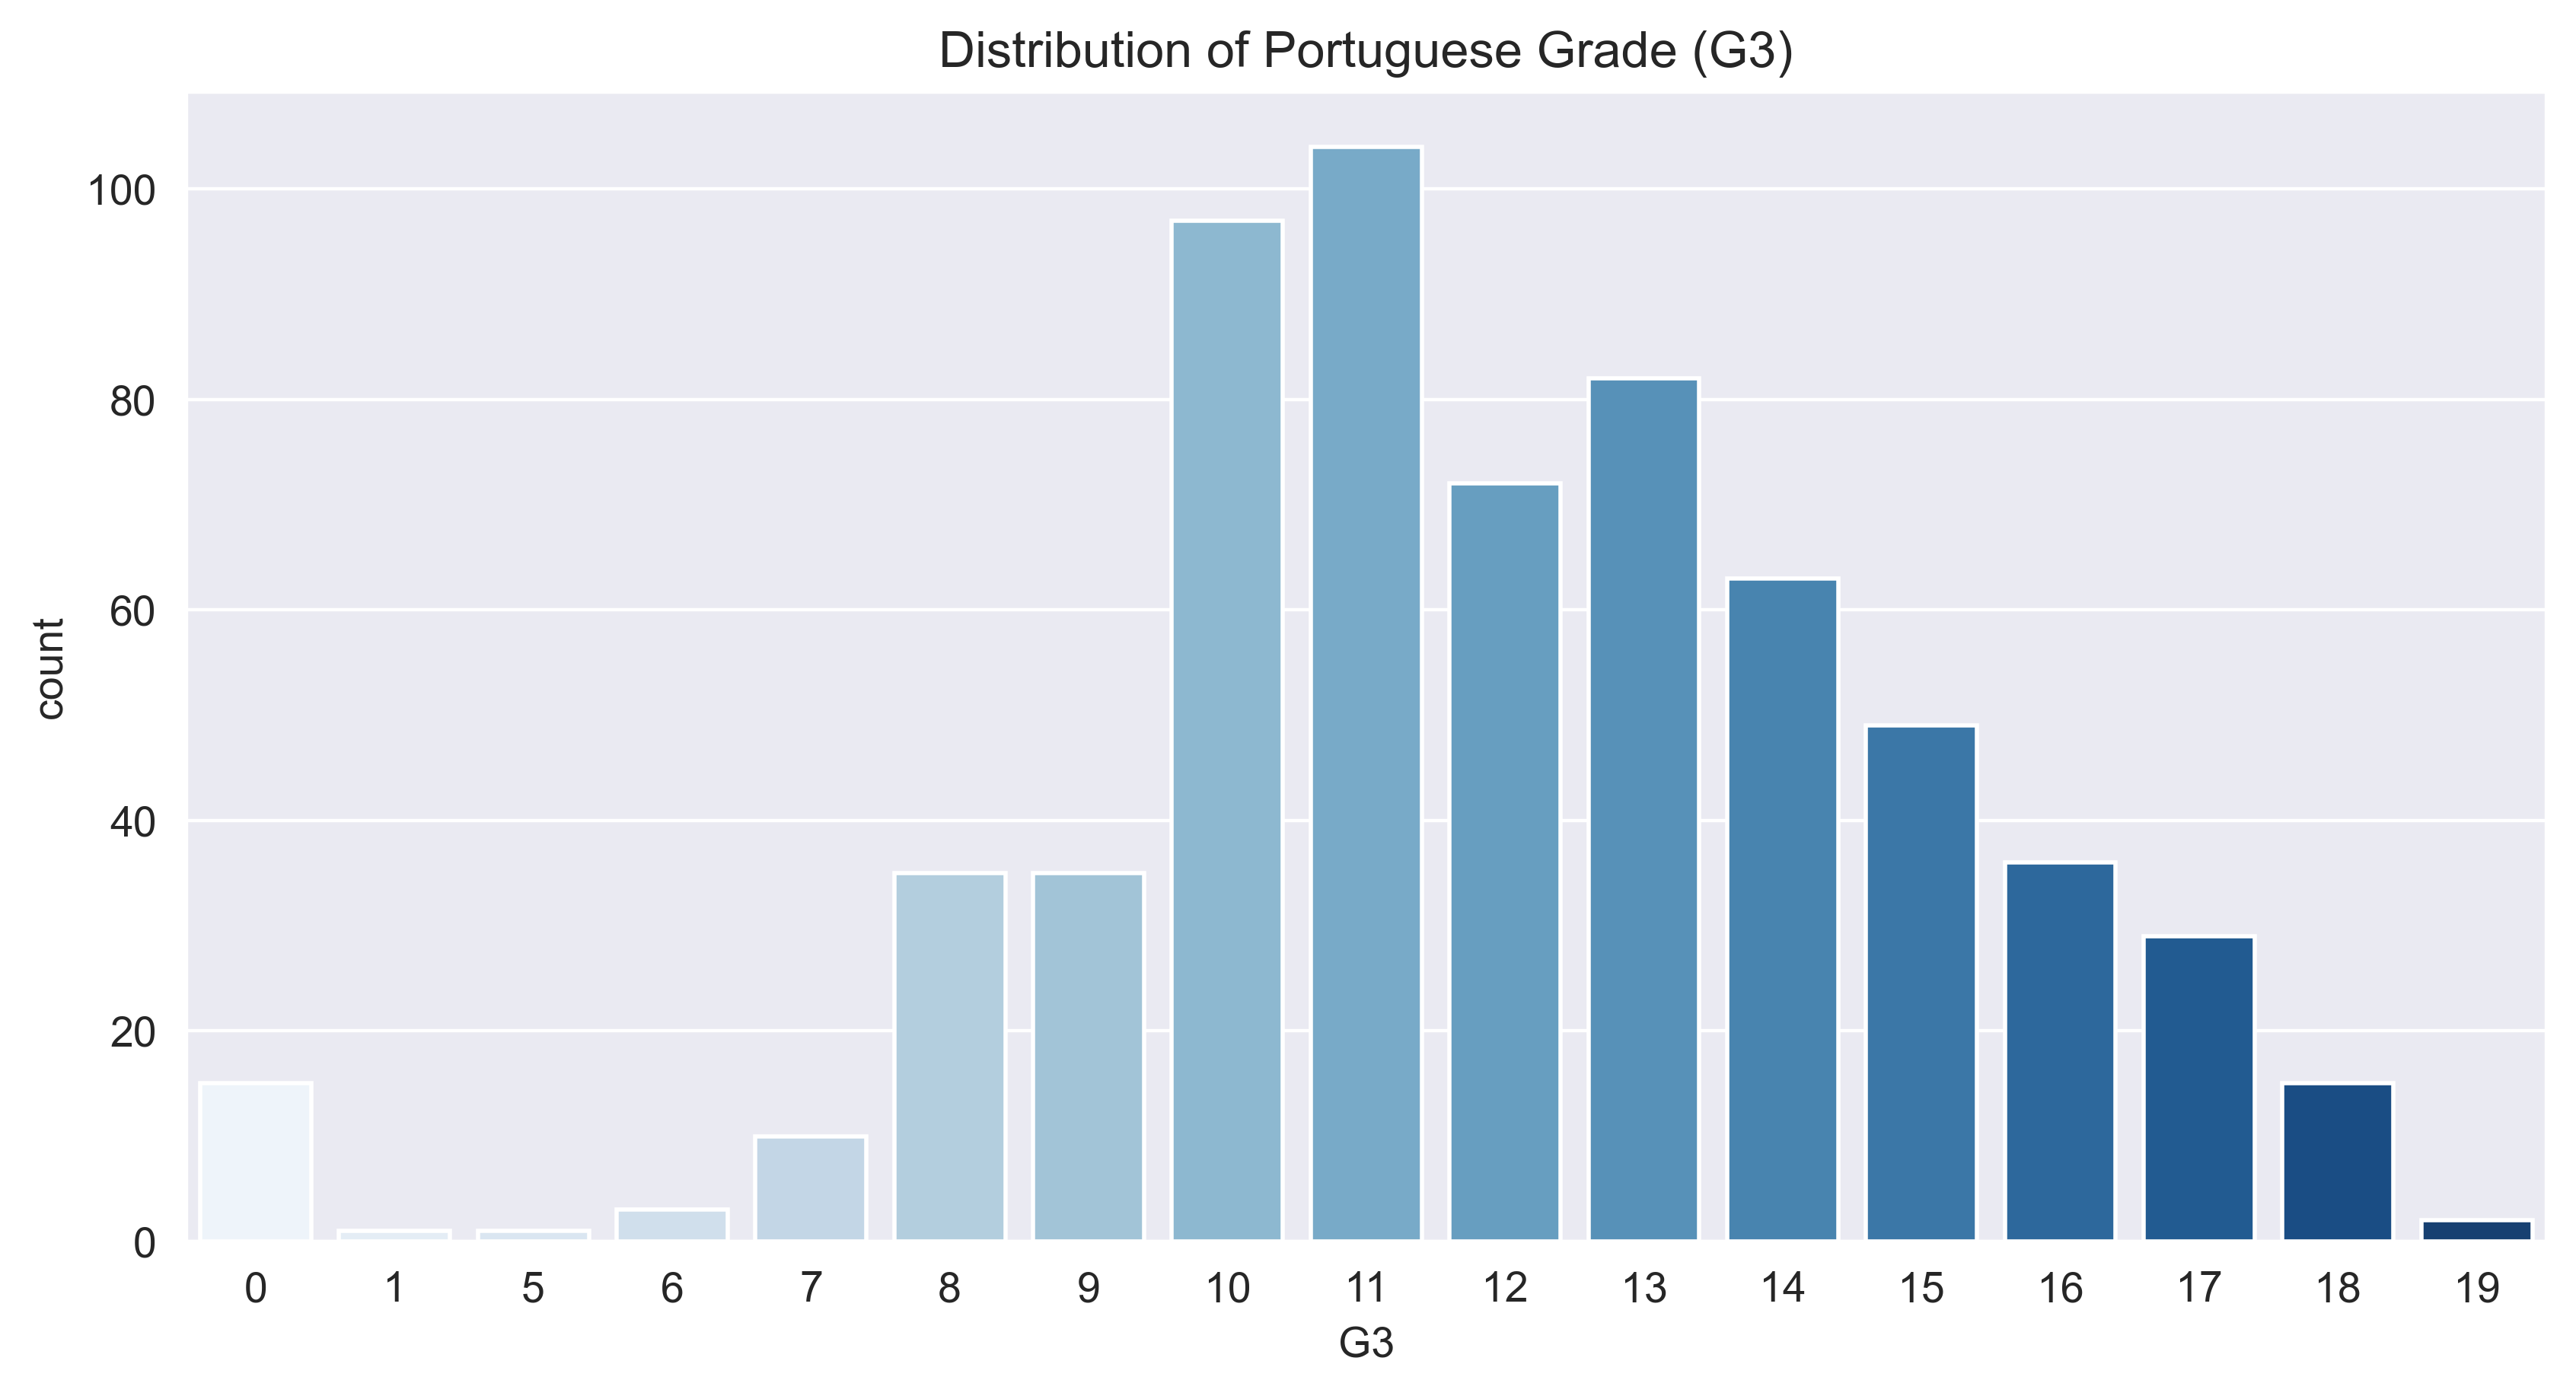

In [9]:
plt.figure(figsize=(10, 5), dpi=400)
sns.countplot(x = df['G3'], palette='Blues')
plt.title('Distribution of Portuguese Grade (G3)')
plt.show()

This is a quasi-gaussian distribution, since it is not perfectly symmetric around the mode. Indeed, in the standard gaussian distribution the mean, the median and the mode coincide, but for the G3 distribution we have:

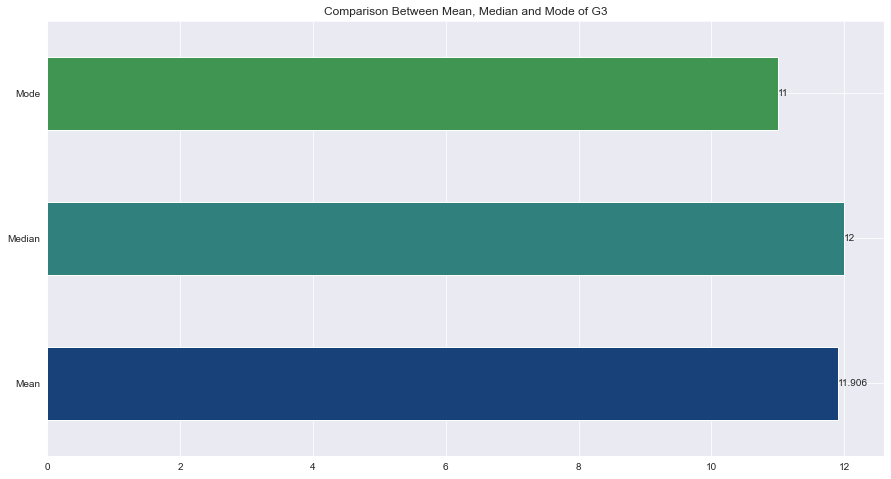

In [10]:
plt.figure(figsize=(15,8))
ax=pd.Series({'Mean': df.G3.mean(), 'Median': df.G3.median(), 'Mode': df.G3.mode()[0]}).plot(kind='barh',
         title='Comparison Between Mean, Median and Mode of G3', color=sns.color_palette('gist_earth'))

for container in ax.containers:
    ax.bar_label(container)  
    
plt.show()

Let us now see the difference between males and females grades:

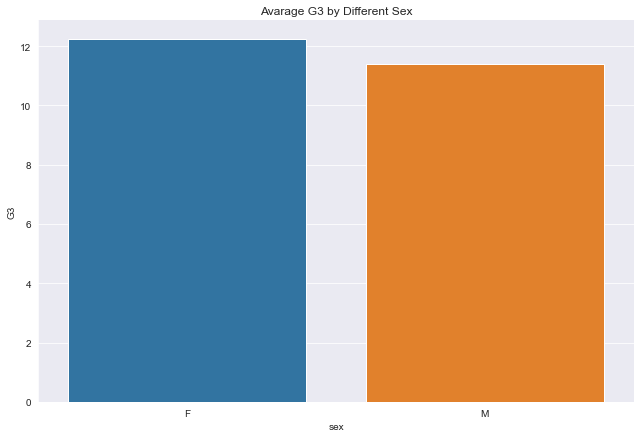

In [11]:
sns.catplot(data=df, x='sex', y='G3', kind='bar', ci=False, aspect=1.5, height=6)
plt.title('Avarage G3 by Different Sex');

### Thus, it seems that there is a tiny difference between males and females. 

Let us now show some other plots involving other categorical features:

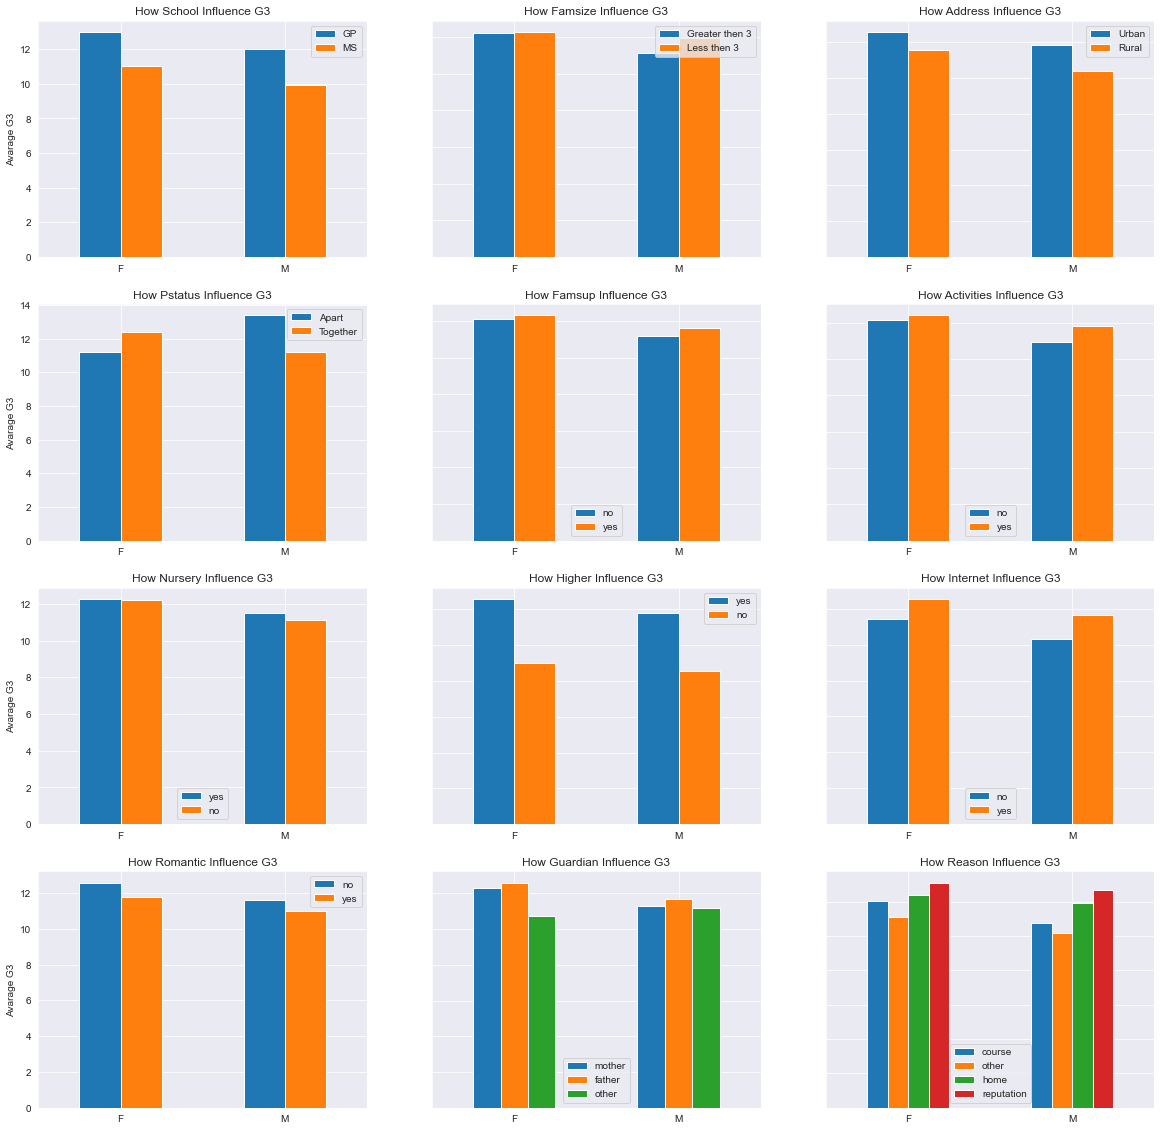

In [12]:
f, axes=plt.subplots(4,3,figsize=(20,20))

for i, feature in enumerate(['school','famsize','address','Pstatus', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic','guardian', 'reason']):
    pd.DataFrame(
        {sex:{item: df[(df[feature]==item)&(df.sex==sex)]['G3'].mean() for item in df[feature].unique(
       )} for sex in df.sex.unique()}).transpose().plot(kind='bar', rot=0, ax=axes[i//3, i%3],
            title='How '+feature.capitalize()+' Influence G3', ylabel='Avarage G3', sharey=True)
    
plt.show()

### From these plots it follows that: 
**-The variables 'school', 'address', 'higher', 'romantic' and 'Internet' influence both females and males portuguese grade in the same way. Specifically, on avarage the students that attend Gabriel Pereira(GP) school have better grades with respect to the Mousinho da Silveira(MS) students. The students who live in a urban zone have better grades with respect to the students that live in Rural zones. The students who plan to continue their studies have better grades with respect to those that do not and the same thing happens with the students who have not a romantic relationship and those who have one. Lastly, students who have an Internet connection have better grades with respect to those that do not have one.<br>
-The variables 'Pstatus' and 'guardian' influence females and males portuguese grade in different ways. Indeed, the females who have parents that are together have better grades with respect to those who have divorced parents, while for the males the opposite is true. Similarly, the females who have a guardian different from a parent have worse grades then the females who have a parent as the guardian, instead the males grades do not seem to be influenced by this variable.<br>
-All other considered variables do not influence the grades significantly.**

Let us now see how the weekend and the workday alcohol consumption influence the school performances of the students.

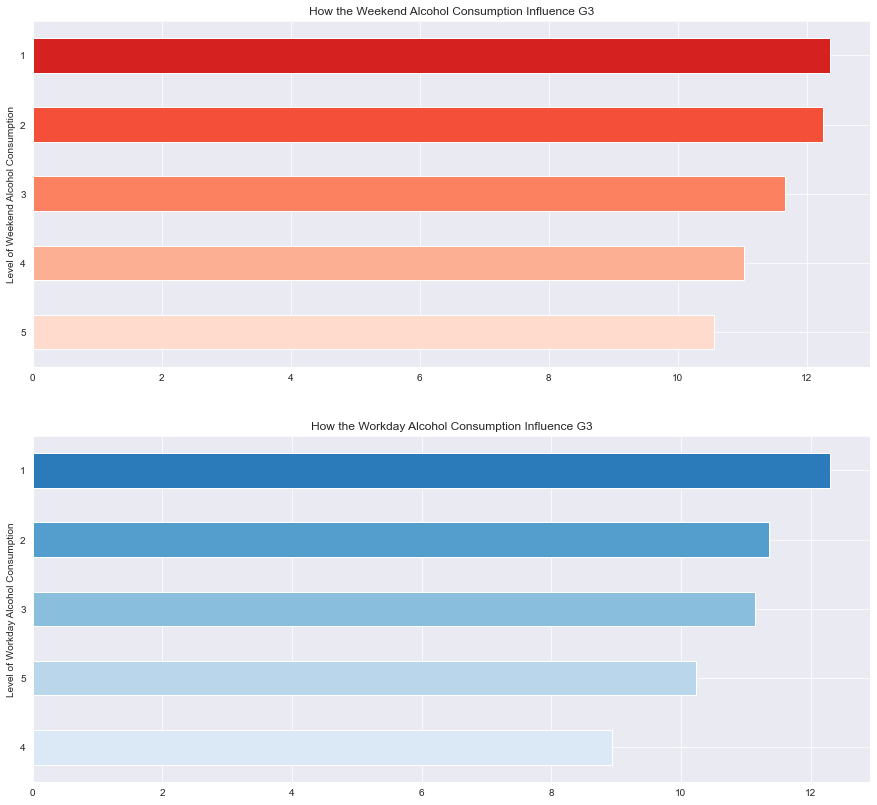

In [13]:
f, axes=plt.subplots(2,1,figsize=(15,14))

pd.Series({item:df[df.Walc==item]['G3'].mean() for item in df.Walc.unique()}).sort_values().plot(kind='barh', 
            color=sns.color_palette('Reds'), title='How the Weekend Alcohol Consumption Influence G3',
            xlabel='Level of Weekend Alcohol Consumption', ax=axes[0])

pd.Series({item:df[df.Dalc==item]['G3'].mean() for item in df.Dalc.unique()}).sort_values().plot(kind='barh', 
            color=sns.color_palette('Blues'), title='How the Workday Alcohol Consumption Influence G3',
            xlabel='Level of Workday Alcohol Consumption', ax=axes[1])

plt.show()

### From these plots is clear that on avarage the portuguese grades(G3) are influenced by the alcohol consumption. In particular, an higher alcohol consumption is associated with a lower school performance.

Let us see if there is any difference between the influence of the alcohol consumption on the males and on the females.

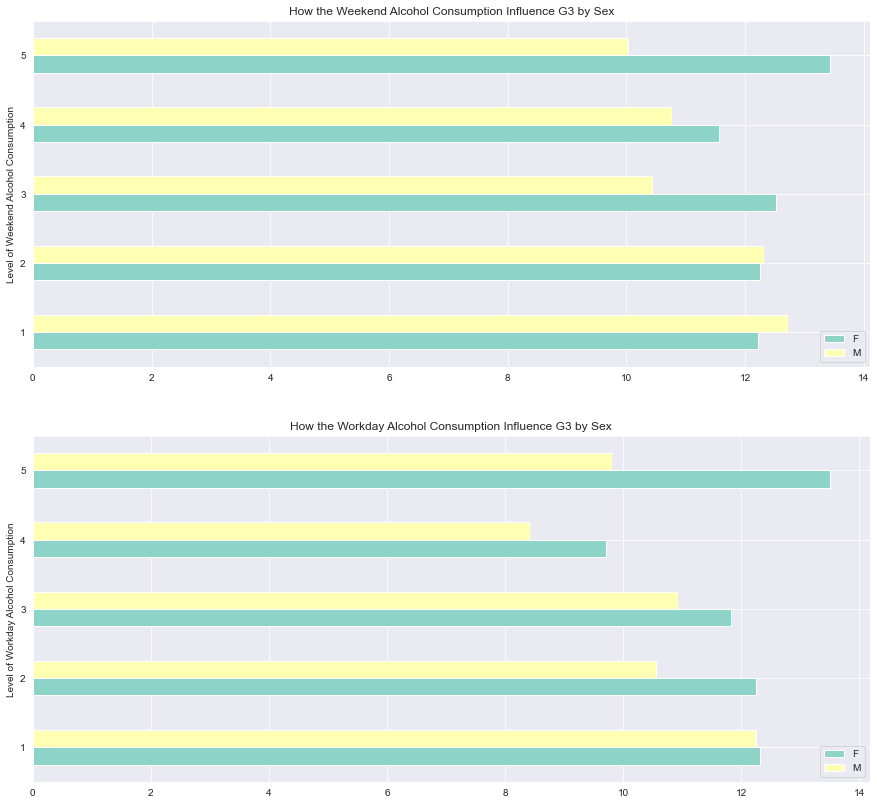

In [14]:
f, axes=plt.subplots(2,1,figsize=(15,14))

pd.DataFrame({sex:{i:df[(df.Walc==i)&(df.sex==sex)]['G3'].mean() for i in range(1,6)} for sex in df.sex.unique()}).plot(
    kind='barh', color=sns.color_palette('Set3'), title='How the Weekend Alcohol Consumption Influence G3 by Sex',
            xlabel='Level of Weekend Alcohol Consumption', ax=axes[0])

pd.DataFrame({sex:{i:df[(df.Dalc==i)&(df.sex==sex)]['G3'].mean() for i in range(1,6)} for sex in df.sex.unique()}).plot(
    kind='barh', color=sns.color_palette('Set3'), title='How the Workday Alcohol Consumption Influence G3 by Sex',
            xlabel='Level of Workday Alcohol Consumption', ax=axes[1])

plt.show()

### These plots suggest that males who have a lower alcohol consumption have better grades in general, while for the females the situation is more complicated. Indeed, we have that the females with the highest workday and weekend alcohol consumption, i.e. Walc and Dalc equal to 5, perform better then the others. Probably, since the dataset is small, this is accidental, namely the considered females with an high alcohol consumption are particularly talented or particularly suited for the subject. Moreover, delating these females with the highest alcohol consumption, also for the females we observe an increase of the average grade with the degrowth of alcohol consumption. 

## How the parents job and education influence the school performances of the sons?

Let us check it out:

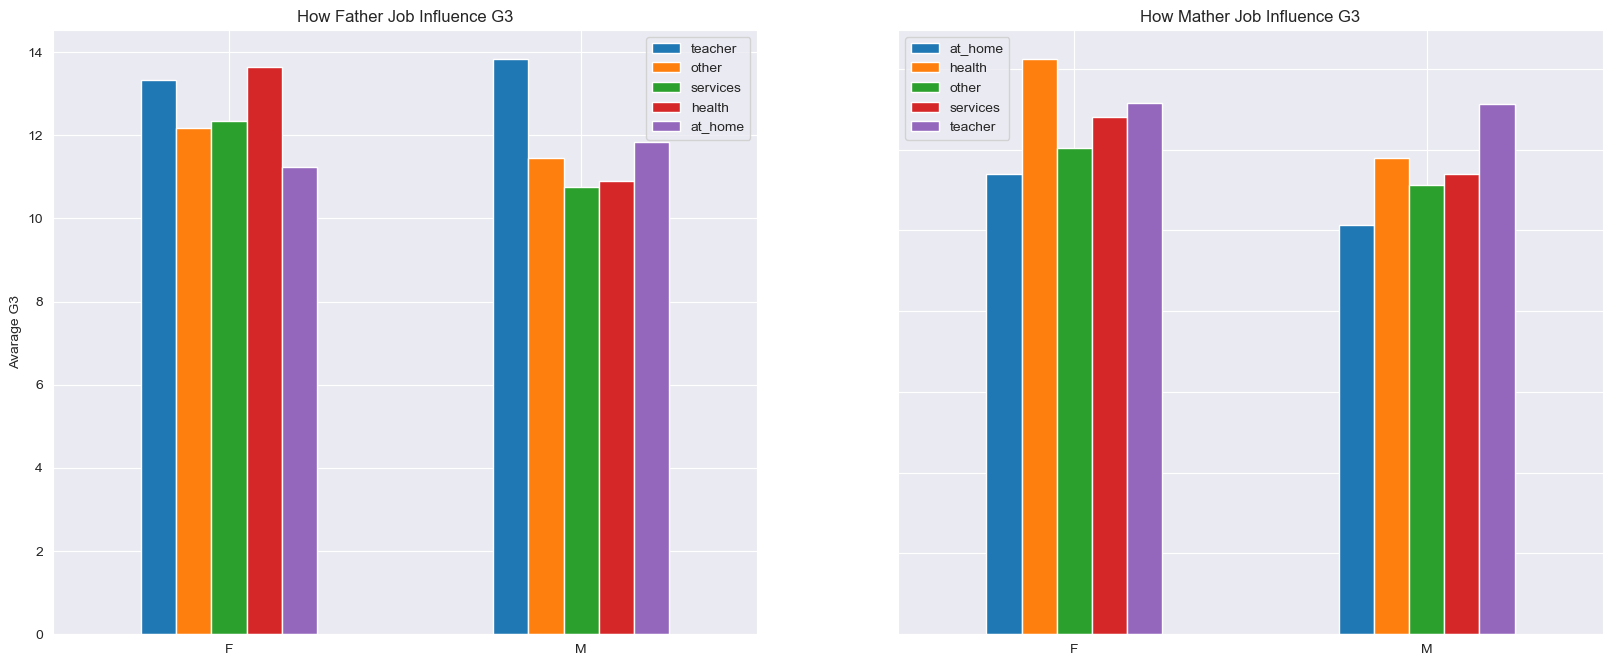

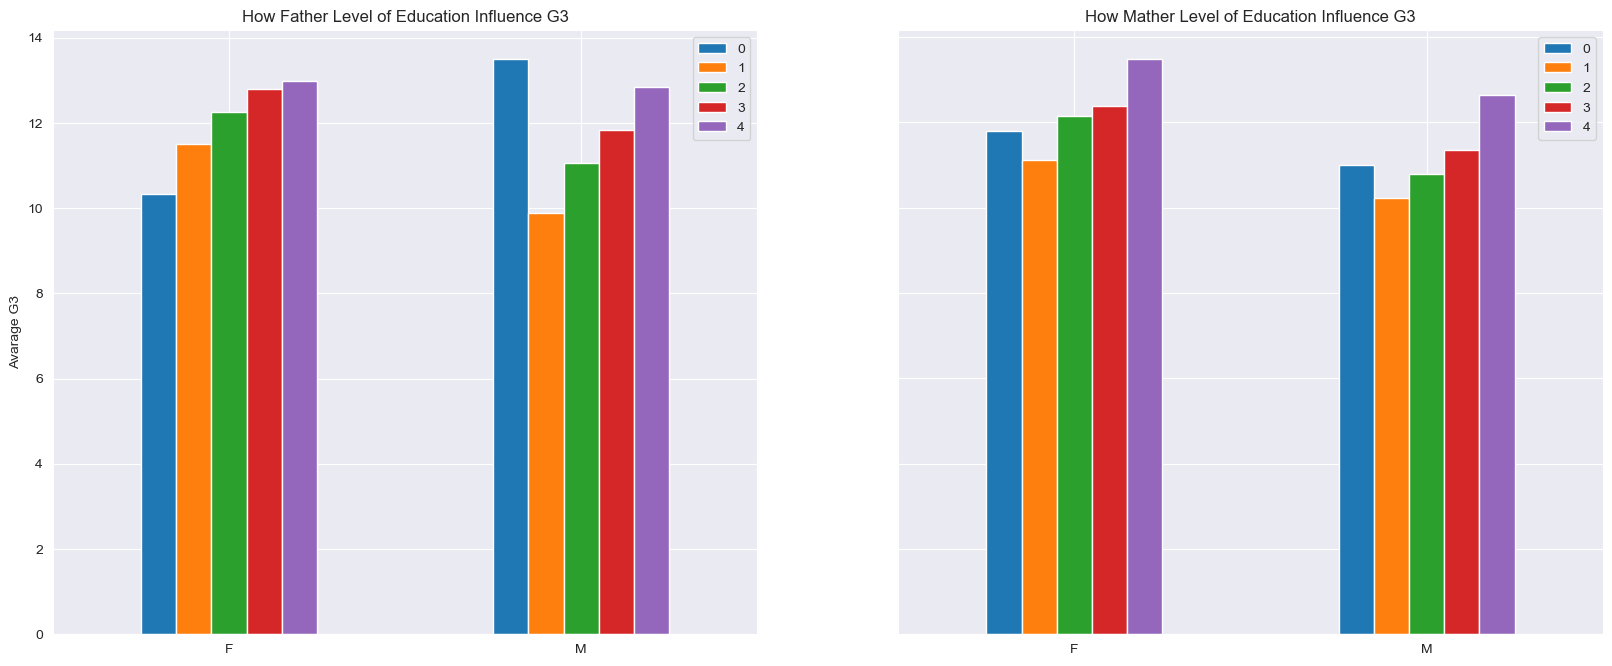

In [15]:
f, axes=plt.subplots(1,2,figsize=(20,8), dpi=100)
pd.DataFrame(
 {sex:{job: df[(df.Fjob==job)&(df.sex==sex)]['G3'].mean() for job in df.Fjob.unique()} for sex in df.sex.unique()}).transpose(
  ).plot(kind='bar', ax=axes[0], title=('How Father Job Influence G3'), ylabel='Avarage G3', sharey=True)
axes[0].tick_params(labelrotation=0)

pd.DataFrame(
 {sex:{job: df[(df.Mjob==job)&(df.sex==sex)]['G3'].mean() for job in df.Mjob.unique()} for sex in df.sex.unique()}).transpose(
  ).plot(kind='bar', ax=axes[1], title='How Mather Job Influence G3', ylabel='Avarage G3', sharey=True)
axes[1].tick_params(labelrotation=0)

plt.show()

f, axes=plt.subplots(1,2,figsize=(20,8), dpi=100)
pd.DataFrame(
 {sex:{edu: df[(df.Fedu==edu)&(df.sex==sex)]['G3'].mean() for edu in range(0,5)} for sex in df.sex.unique()}).transpose(
  ).plot(kind='bar', ax=axes[0], title=('How Father Level of Education Influence G3'), ylabel='Avarage G3', sharey=True)
axes[0].tick_params(labelrotation=0)

pd.DataFrame(
 {sex:{edu: df[(df.Medu==edu)&(df.sex==sex)]['G3'].mean() for edu in range(0,5)} for sex in df.sex.unique()}).transpose(
  ).plot(kind='bar', ax=axes[1], title='How Mather Level of Education Influence G3', ylabel='Avarage G3', sharey=True)
axes[1].tick_params(labelrotation=0)

plt.show()

### Therefore, for both females and males having a teacher as a parent significantly increase the grade. It is interesting to notice that for females having a parent who works into the health sector increase the grade too, while for males that is not true. Furthermore, for both females and males the avarage portuguese grade increases as the level of education of the parents increases. We have an exception for the males who have a father with a level of education equals to zero, but it is plausible that even in this case, as it happens for females with the highest alcohol consumption, this is due to the talent of the latter.  

With these plots we have only seen how a single parent education influence G3. Obviously, we expect that students having both parents with high level of education have better grades with respect to those who have only one. Let us consider a plot that allow us to visualize both parents education level:

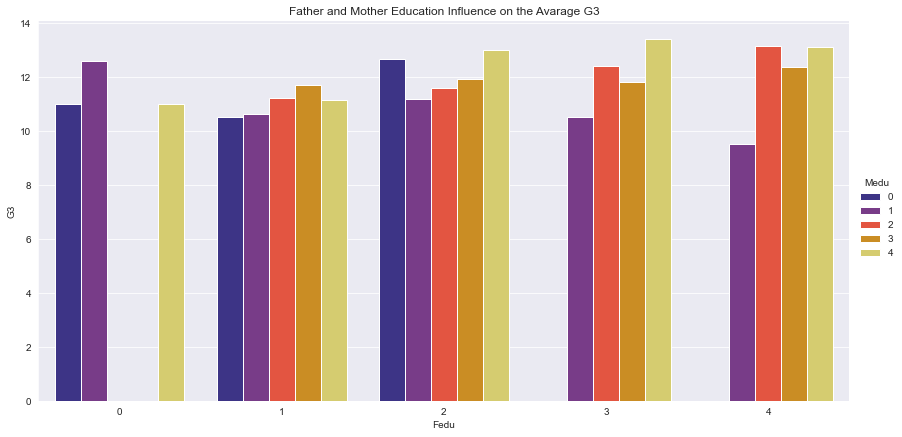

In [16]:
sns.catplot(data=df, x='Fedu', y='G3', hue='Medu', kind='bar', ci=False, height=6, aspect=2, palette='CMRmap')
plt.title('Father and Mother Education Influence on the Avarage G3');

### From the latter is clear that our expectation is met: students with both parents well educated perform better then the students with a single parent who have a high level of education.

Let us now see how the quality of family relations, the amount of freetime, going out with friends and the health influence G3:

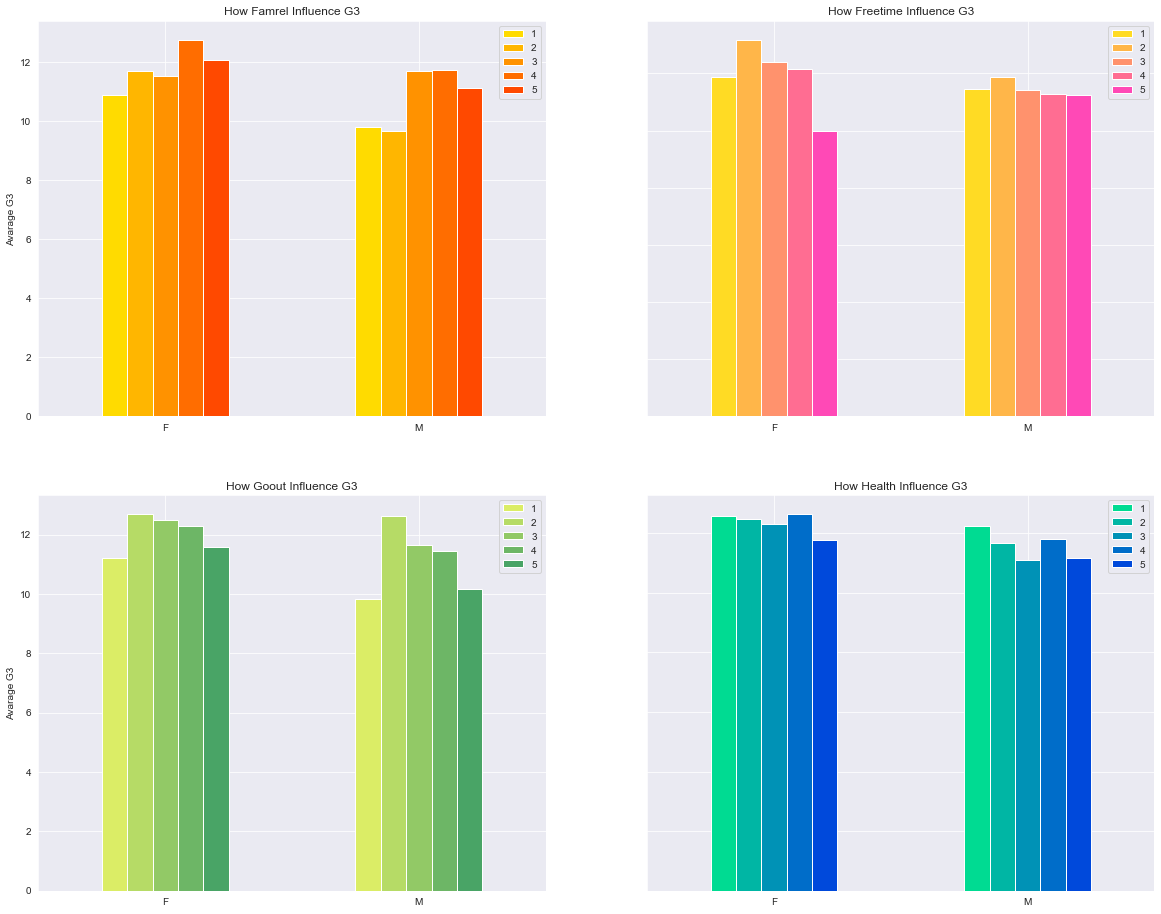

In [17]:
palette=['autumn_r', 'spring_r', 'summer_r', 'winter_r']

f, axes=plt.subplots(2,2,figsize=(20,16))
for j,feature in enumerate(['famrel', 'freetime', 'goout', 'health']):
    pd.DataFrame({sex:{i:df[(df[feature]==i)&(df.sex==sex)]['G3'].mean() for i in range(1,6)} for sex in df.sex.unique(
    )}).transpose().plot(kind='bar', rot=0, ax=axes[j//2,j%2], color=sns.color_palette(palette[j]), 
    title='How '+feature.capitalize()+' Influence G3', ylabel='Avarage G3', sharey=True)

**1)On avarage the students with a good level of family relations perform better then those who have a poor quality of family relations.<br>
2)For females it is clear that on average the grades tend to decrease with the increasing of free time, while for men this variable does not substantially affect the grades.<br>
3)On avarage students with the poorest level of 'goout' have the worst grades, while those who have a level slightly higher have the best grades. After that all the students with an higher level of 'goout' tend to have worse grades. Thus, students with a decent level of sociability perform better then those who have a terrible or excessive level of sociability.<br>
4)The health slighlty influence the performances of the students and in particular the avarage grades decrease with increasing of the health level. Probably this is due to the fact that students with a poor level of health have a lower level of alcohol consumption and a lower level of sociability. We will see in a while how the health of the students influeces these variables.**

Let us now see how 'studytime' and 'traveltime', influence G3. Obviously, we expect that students who study more to have higher grades on average, while those who take longer to reach school to have lower grades. 

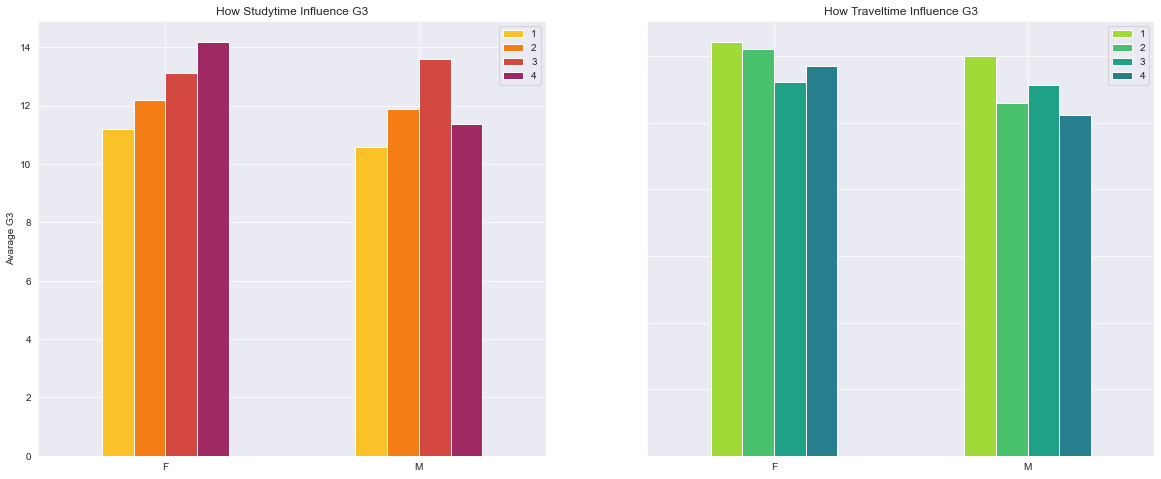

In [18]:
palette=['inferno_r', 'viridis_r']

f, axes=plt.subplots(1,2,figsize=(20,8))
for j,feature in enumerate(['studytime', 'traveltime']):
    pd.DataFrame({sex:{i:df[(df[feature]==i)&(df.sex==sex)]['G3'].mean() for i in range(1,5)} for sex in df.sex.unique(
    )}).transpose().plot(kind='bar', rot=0, ax=axes[j], color=sns.color_palette(palette[j]), 
    title='How '+feature.capitalize()+' Influence G3', ylabel='Avarage G3', sharey=True)

### From these plots it follows that our expectations are both met. However, we see an anomaly: males students who have the higher level of 'studytime' perform worse then those who have an intermediate level of 'studytime'. The usual reasoning applies: it could be an accidental fact due to the small size of the dataset.

In order to conclude the analysis on G3 let us see how the last three variables, i.e. 'failures', 'age' and 'absences', influence the latter. We start from 'failures' and 'age':

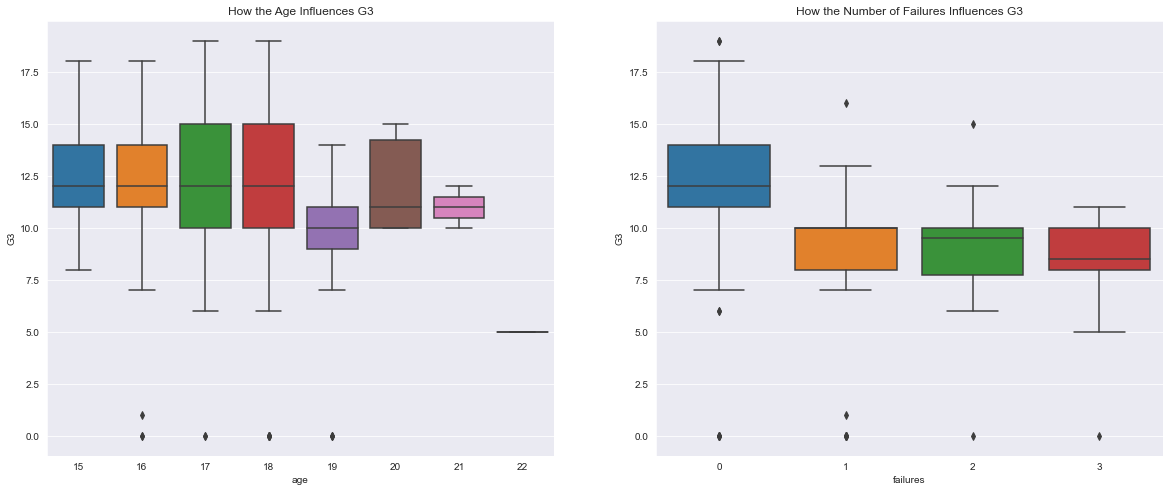

In [19]:
f, axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(data=df, y='G3', x='age', ax=axes[0]).set(title='How the Age Influences G3')

sns.boxplot(data=df, x='failures', y='G3', ax=axes[1]).set(title='How the Number of Failures Influences G3')

plt.show()

### As we can see the median value of G3 is not influenced by the age if the latter is included between 15 and 18, even though the distribution tend to be wider by increasing the age. Conversely, the median value of G3 decreases for ages higher then 18. With regard to the number of failures, the median value of G3 decreases with the increasing of the number of failures.

For the absences we have:

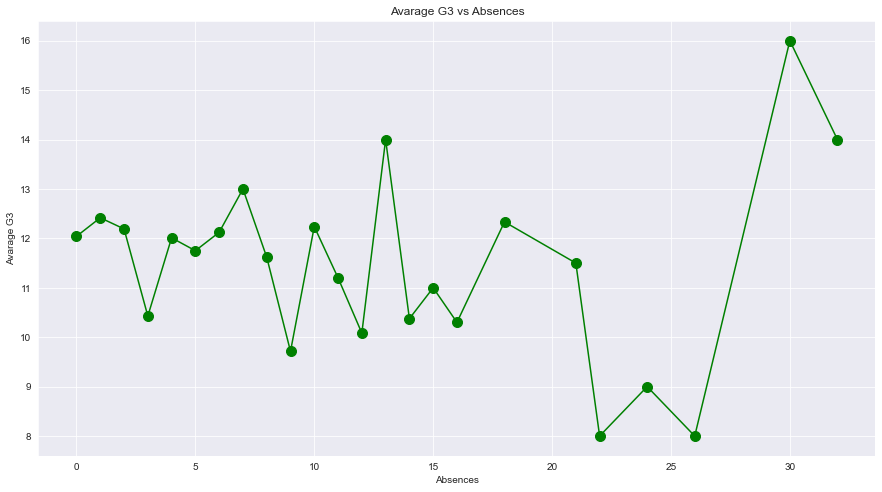

In [20]:
values=df.groupby('absences')['G3'].mean().values
index=df.groupby('absences')['G3'].mean().index

plt.figure(figsize=(15,8))
plt.plot(index, values, marker='.', markersize=20,linestyle='-', color='green')
plt.xlabel('Absences')
plt.ylabel('Avarage G3')
plt.title('Avarage G3 vs Absences')
plt.show()

### Hence, the relation between absences and the grade G3 is pretty irregular.

After the analysis on the variables that influence G3, let us see other insights from the data. Let us start with the analysis of the variables which influence alcohol consumption:

## Weekend Alcohol Consumption

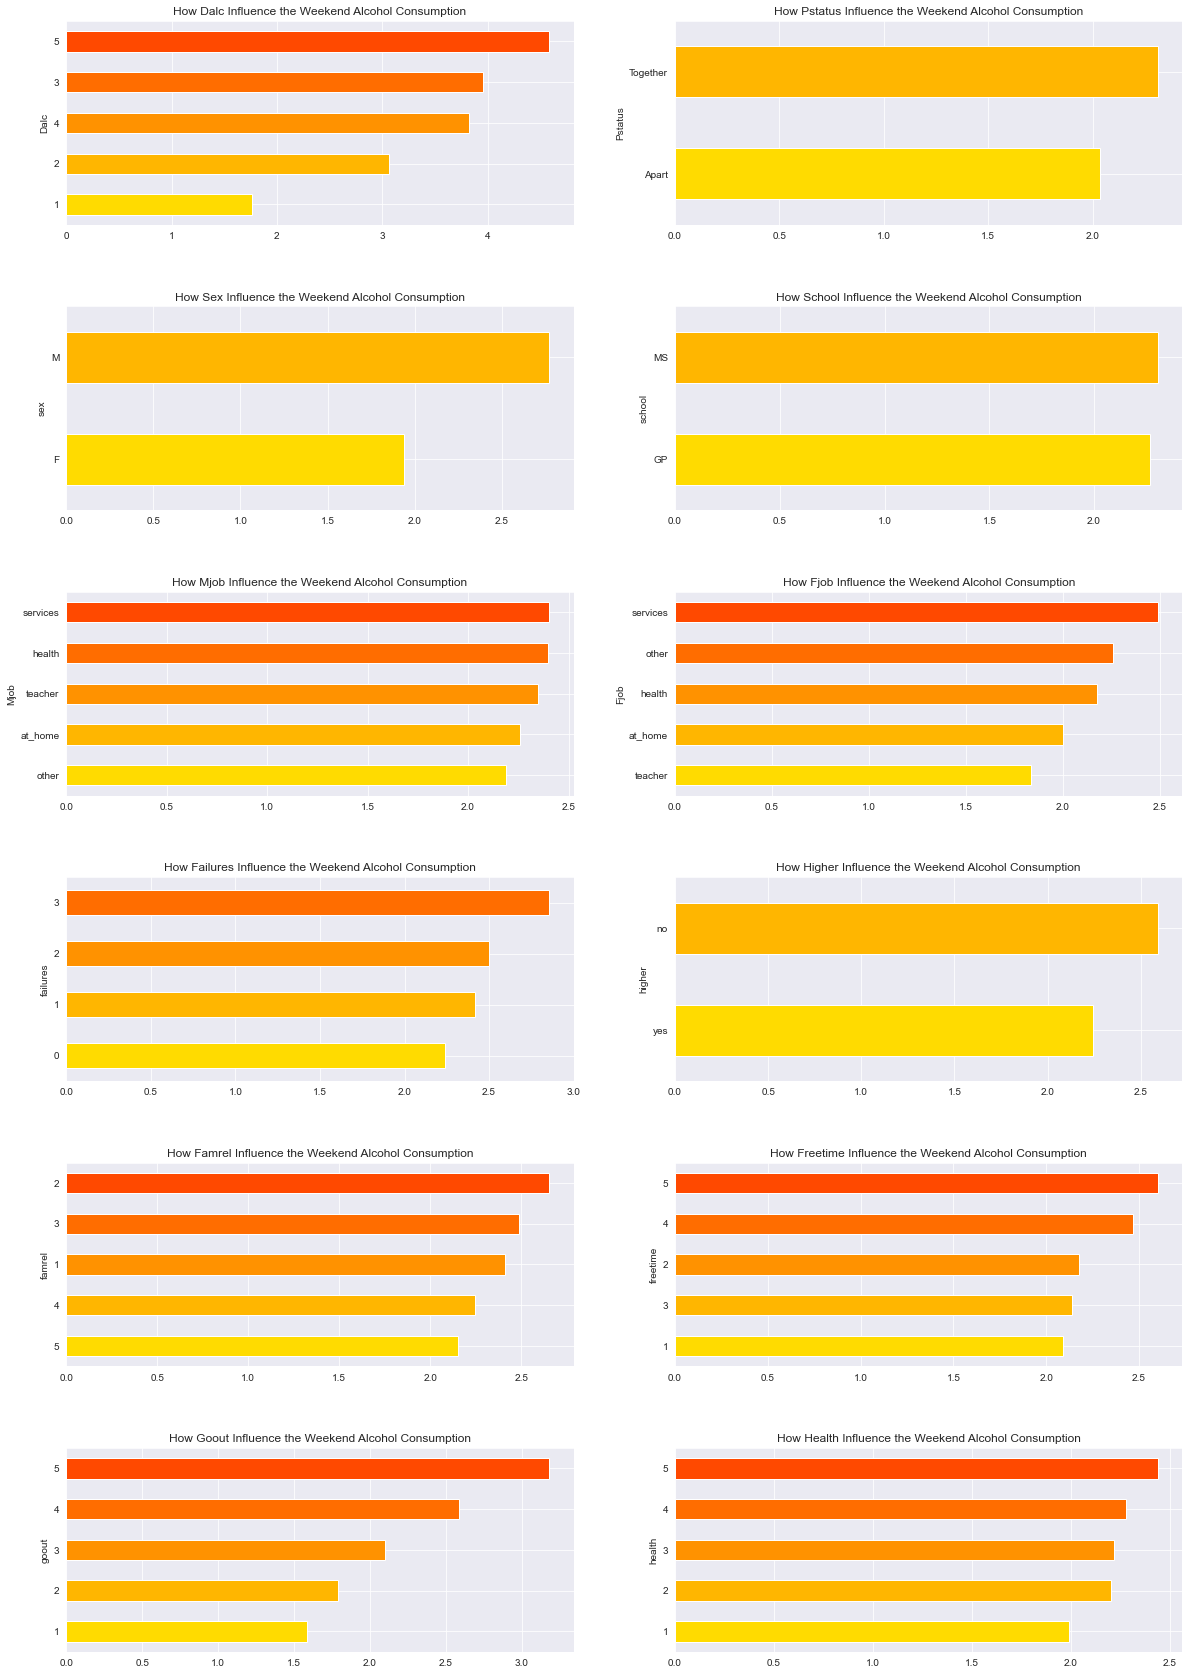

In [21]:
f, axes=plt.subplots(6,2, figsize=(20,30))
plt.subplots_adjust(hspace=0.4)

for i,feature in enumerate(['Dalc','Pstatus','sex','school','Mjob','Fjob','failures',
                  'higher','famrel','freetime','goout','health']):
    df.groupby(feature)['Walc'].mean().sort_values().plot(kind='barh', color=sns.color_palette('autumn_r'), ax=axes[i//2, i%2],
                            title='How '+feature.capitalize()+' Influence the Weekend Alcohol Consumption')
    
plt.show()

**Hence: <br>
-The weekend alcohol consumption tend to increase with the increasing of the workday alcohol consumption.<br>
-Students who have divorced parents consume less alcohol. <br>
-Males have an alcohol level consumption around 40% higher then females.<br>
-Students who have a father that is a teacher consume less alcohol, while students who have a father that works into civil service consume more alcohol.<br>
-The alcohol consumption increases with the increasing of the number of previous class failures.<br>
-Students who plan to continue their studies consume less alcohol then those who do not.<br>
-The alcohol consumption increases with the increasing of the freetime, with the increasing of the variable 'goout' and with the increasing of the level of health, as we have supposed previously.**

## Recoding of the variables

In order to easily visualize some other plots we now recode some binary variables, i.e. variables like 'Pstatus' or 'famsup' that have only two values, by replacing the values with 0 or 1. Moreover, this procedure is going to be useful for the prediction part, where we are going to train some machine learning models to predict G3. Therefore, let us recode the variables: 

In [22]:
D= {'sex':{'M':0, 'F':1},
    'address': {'Urban':0, 'Rural':1},
    'famsize': {'Less then 3':0, 'Greater then 3':1},
    'Pstatus': {'Together':0, 'Apart':1},
           'schoolsup':{'no':0,'yes':1},
           'famsup':{'no':0,'yes':1},
           'paid':{'no':0,'yes':1},
           'activities':{'no':0,'yes':1},
           'internet':{'no':0,'yes':1},
           'romantic':{'no':0,'yes':1},
            'higher':{'no':0,'yes':1},
             'nursery':{'no':0,'yes':1}}

for column in list(D.keys()):
    df[column] = df[column].map(D[column])

In [23]:
df.info() #just a check 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    int64 
 2   age         649 non-null    int64 
 3   address     649 non-null    int64 
 4   famsize     649 non-null    int64 
 5   Pstatus     649 non-null    int64 
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    int64 
 16  famsup      649 non-null    int64 
 17  paid        649 non-null    int64 
 18  activities  649 non-null    int64 
 19  nursery     649 non-null    int64 
 20  higher    

I recoded all the binary variables, including the student's sex, except for the student's school variable, since the latter is not a binary variable per se, but it is in our case as only two schools were considered. However, if in the future the dataset will be updated the school variable could be contain more then two values. 

## Correlation Matrix

Since now we focused on G3 and on the weekend alcohol consumption. Let us now see if there are some other correlations between variables by using a correlation matrix:

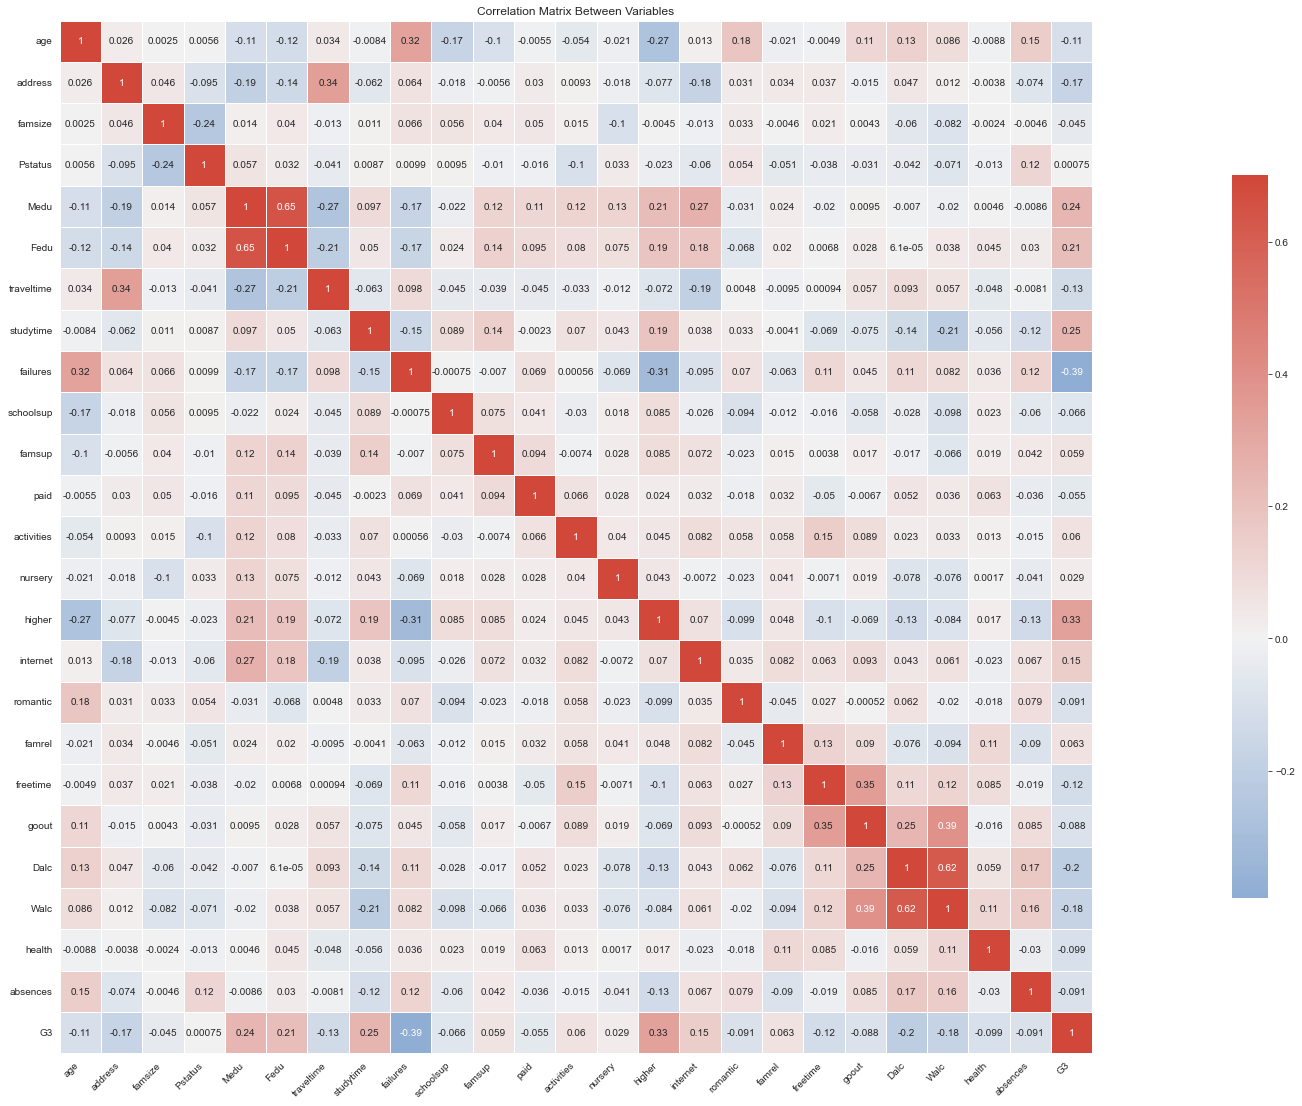

In [24]:
plt.figure(figsize=(50,19))
cmap = sns.diverging_palette(250, 15, as_cmap=True)
sns.heatmap(df.drop(['sex','school','Mjob','Fjob','reason','guardian'], axis=1).corr(),
            annot=True, vmax=.7, center=0, cmap=cmap,
            square=True, linewidths=.7, cbar_kws={"shrink": .7})
plt.title('Correlation Matrix Between Variables')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

**From the correlation matrix it follows that:<br>
-There are just two 'strong' positive linear correlation between 'Fedu' and 'Medu' and between 'Walc' and 'Dalc', while all the other correlations are not so strong. <br>
-There is a little positive linear correlation between age and failures, traveltime and address, Medu and internet, Medu and higher, Fedu and internet, Fedu and higher, studytime and higher, failures and age, Walc and goout.<br>
-There is a little negative linear correlation between age and higher, address and internet, failures and Medu, failures and Fedu, higher and failures, Walc and studytime.**

Let us conclude the exploratory data analysis by showing some plots in order to see some of these relations between variables. In order to build them we plot the average value of one variable as a function of the value of an another one.  

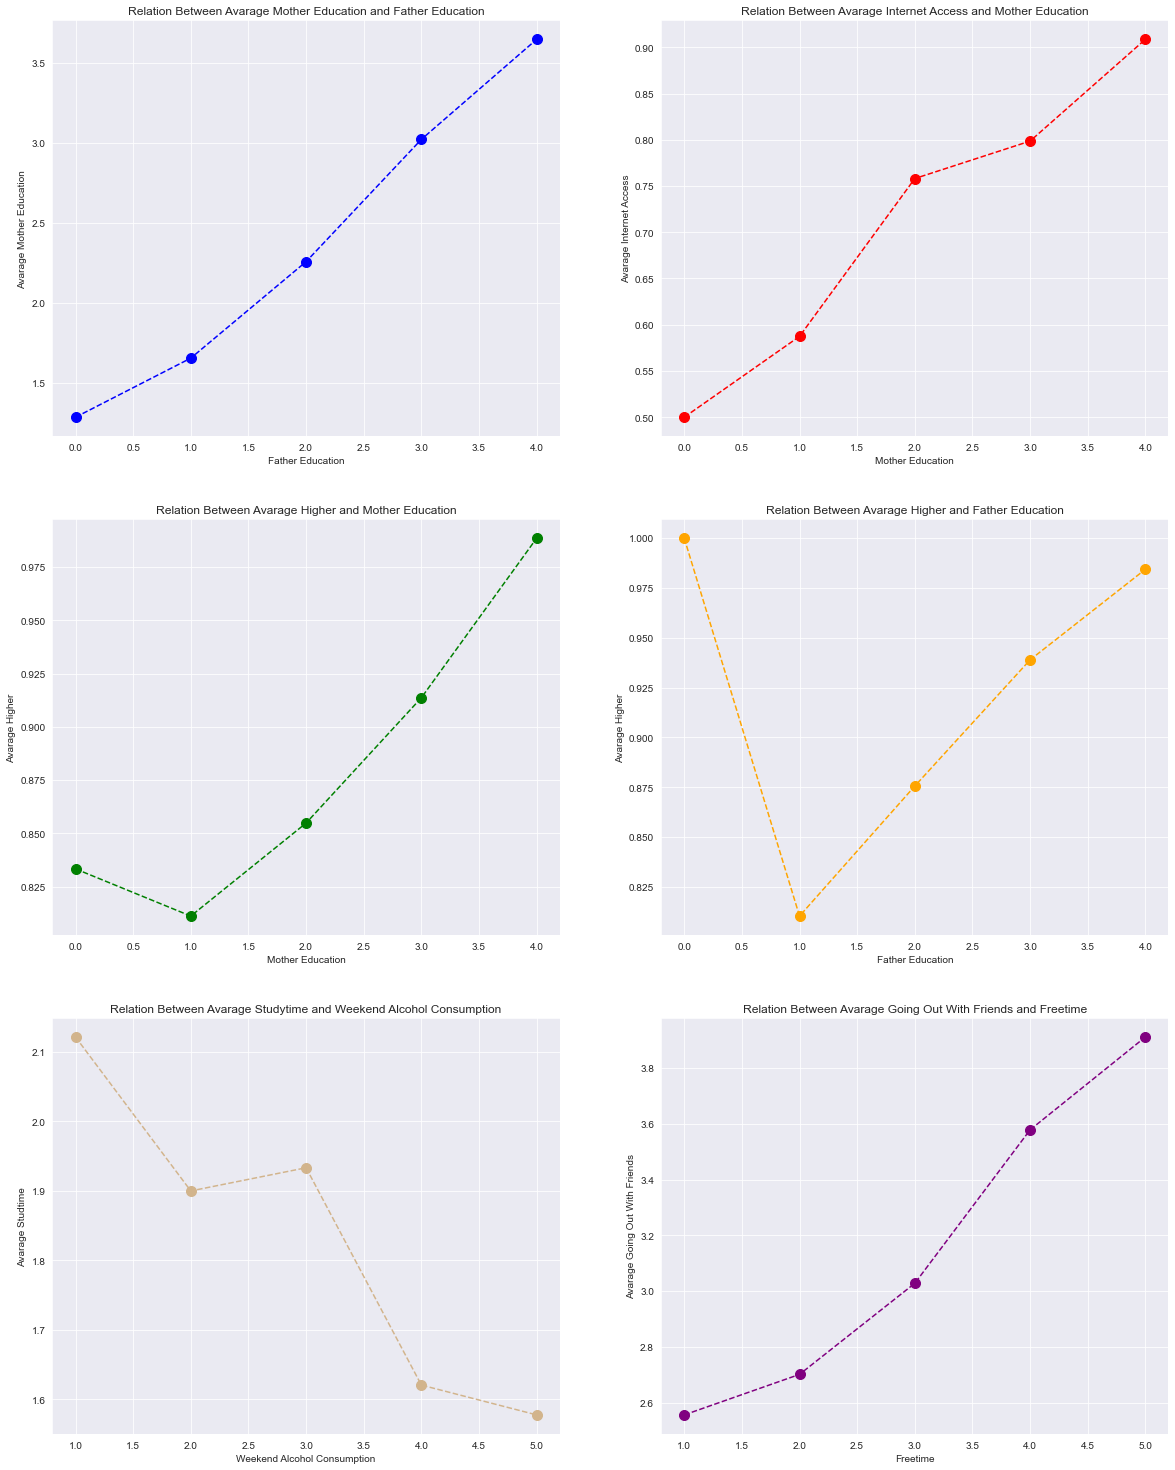

In [25]:
values=[df.groupby('Fedu')['Medu'].mean().values, df.groupby('Medu')['internet'].mean().values,
       df.groupby('Medu')['higher'].mean().values, df.groupby('Fedu')['higher'].mean().values,
       df.groupby('Walc')['studytime'].mean().values, df.groupby('freetime')['goout'].mean().values]

index=[df.groupby('Fedu')['Medu'].mean().index, df.groupby('Medu')['internet'].mean().index,
      df.groupby('Medu')['higher'].mean().index, df.groupby('Fedu')['higher'].mean().index,
      df.groupby('Walc')['studytime'].mean().index, df.groupby('freetime')['goout'].mean().index]

titles=['Relation Between Avarage Mother Education and Father Education', 
        'Relation Between Avarage Internet Access and Mother Education',
       'Relation Between Avarage Higher and Mother Education', 'Relation Between Avarage Higher and Father Education',
       'Relation Between Avarage Studytime and Weekend Alcohol Consumption',
        'Relation Between Avarage Going Out With Friends and Freetime' ]

xlabels=['Father Education', 'Mother Education', 'Mother Education', 'Father Education', 
         'Weekend Alcohol Consumption', 'Freetime']

ylabels=['Avarage Mother Education', 'Avarage Internet Access', 'Avarage Higher', 'Avarage Higher', 
         'Avarage Studtime', 'Avarage Going Out With Friends']

colors=['blue', 'red', 'green', 'orange', 'tan', 'purple']

f, axes=plt.subplots(3,2,figsize=(20,26))
for i in range(len(values)):
    plt.subplot(3,2,i+1)
    plt.plot(index[i], values[i], color=colors[i], linestyle='--',marker='.', markersize=20)
    plt.xlabel(xlabels[i])
    plt.ylabel(ylabels[i])
    plt.title(titles[i])

# ML models 

Now we want to train some machine learning models in order to predict the value of the grade G3. Let us start by defining the dataset, i.e. the features X and the labels y. To do that we need to preprocess the data. In specific, we need to transform the categorical data into dummy variables, by using the one-hot encoding, and to scale the features between 0 and 1. In order to do that we use the function get_dummies() of the Pandas library and MinMaxScaler() of the library sklearn.preprocessing respectively.  

In [26]:
# dataset 
X=scaler().fit_transform(pd.get_dummies(df.drop(['G3'], axis=1)))  #features
y=df['G3'].values     #labels 

After that we split the dataset into the training and the test set:

In [27]:
# train-test split 
SEED=1

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=SEED)

In particular, thanks to the argument test_size=0.2 the 80% of the dataset belongs to the training set and the 20% to the test set.

# Cross Validation

The models that we are going to train to predict G3 are: <br>
* K-Nearest Neighbors (KNN) <br>
* Decision Tree (DT) <br>
* Lasso Regression (Lasso) <br>
* Support Vector Regressor (SVR) <br>
* Random Forest (RF)<br>

All of these models have one or more hyperparameters which should be fixed. In order to tune these hyperparameters we are going to use a cross validation. Here there is a prospectus on all hyperparameters that we are going to set, with the respective meanings, by using a cross validation procedure:

|   MODEL	|   HYPERPARAMETER	|   MEANING	|
|---	|---	|---	|
|  KNN  	|   n_neighbors	|   It is the number of the nearest examples, belonging to the training set, to the considered test example |
|   DT	|   max_depth	|   It is the max depth of the decision tree, i.e. the max number of nodes	|
|   Lasso	|   alpha	|  It is the constant that multiplies the L1 term, controlling regularization strength 	|
|   	|   tol	|  It is the tolerance for the optimization: if the updates are smaller than tol, the optimization code checks the dual gap for optimality and continues until it is smaller than tol 	|
|   	|   max_iter	|   It is the maximum number of iterations	|
|  SVR 	|   Kernel	|   It is the kernel type to be used in the algorithm	|
|   	|   C	|   It is the regularization parameter. The strength of the regularization is inversely proportional to C. It must be strictly positive	|
|   	|   epsilon	|   It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.	|
|   	|   gamma	|  It is a kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid 	|
|   RF	|   n_estimators	|  It is the number of the decision trees used 	|
|   	|  max_depth 	|   It is the max depth of a single decision tree	|
|   	|   max_features	|  It is the number of random features to consider at each split 	|


Thus, we are going to tune all of these hyperparameters. For doing this we define two dictionaries: one called 'models' which contains all the model that we are going to train, and the another one called 'parameters' which contains all the hyperparameters that we are going to tune.

In [28]:
models={'KNN': KNN(), 
        'DT': DT(), 
        'Lasso': Lasso(),
        'SVR': SVR(), 
        'RF': RF(random_state=SEED)}

parameters={'KNN':{'n_neighbors':[i for i in range(3,50)]}, 
           'DT':{'max_depth':[i for i in range(1,25)]}, 
           'Lasso':{'alpha':[i for i in range(50)], 'tol':[0.1,0.01,0.001,0.0001], 'max_iter':[j for j in range(100,1100,100)]},
           'SVR':{'kernel':['linear', 'poly', 'rbf'], 'C':[i for i in range(101)],
                  'epsilon':[0.0001, 0.001, 0.01, 0.1], 'gamma':['scale','auto']},
           'RF':{'n_estimators':[i for i in range(10,100)],  
                'max_depth':[i for i in range(1,25)], 'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}}


Now we are ready for the cross validation:

In [29]:
cval={}
for model in models.keys():
    cval[model]=RSCV(models[model], parameters[model], cv=10, scoring='neg_mean_absolute_error')
    cval[model].fit(X_train, y_train)
    print('The best parameters for '+model+' are: {}'.format(cval[model].best_params_))

The best parameters for KNN are: {'n_neighbors': 18}
The best parameters for DT are: {'max_depth': 2}
The best parameters for Lasso are: {'tol': 0.0001, 'max_iter': 400, 'alpha': 24}
The best parameters for SVR are: {'kernel': 'poly', 'gamma': 'auto', 'epsilon': 0.1, 'C': 42}
The best parameters for RF are: {'n_estimators': 73, 'max_features': 0.5, 'max_depth': 20}


### These are the best hyperparameters according to the cross validation. 

Since we have the best hyperparameters we may test the models and we may see how model perform the best.

# Models Performace 

In [30]:
# I redefine the models dictionary by introducing the 'best models' according to the cross validation

models['KNN']=cval['KNN'].best_estimator_

models['DT']=cval['DT'].best_estimator_

models['Lasso']=cval['Lasso'].best_estimator_

models['SVR']=cval['SVR'].best_estimator_

models['RF']=cval['RF'].best_estimator_

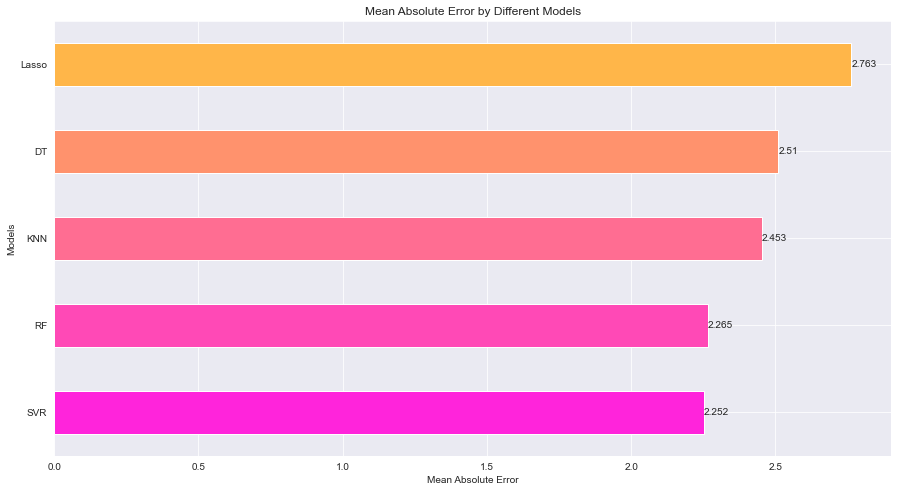

In [31]:
# I compute the predictions and the MAE obtained by all the trained models.
y_pred={}
errors={}
for model in models.keys():
    y_pred[model]=models[model].predict(X_test)
    errors[model]=round(MAE(y_test, y_pred[model]),3)
    
plt.figure(figsize=(15,8))
ax=pd.Series(errors).sort_values().plot(kind='barh', rot=0, color=sns.color_palette('spring'), 
                    title='Mean Absolute Error by Different Models')

for container in ax.containers:
    ax.bar_label(container)    
plt.xlabel('Mean Absolute Error')
plt.ylabel('Models')
plt.show()

### Hence the best models are RF and SVR.

Let us plot the real values and the predictions made by the two models in order to better understand how these models work.

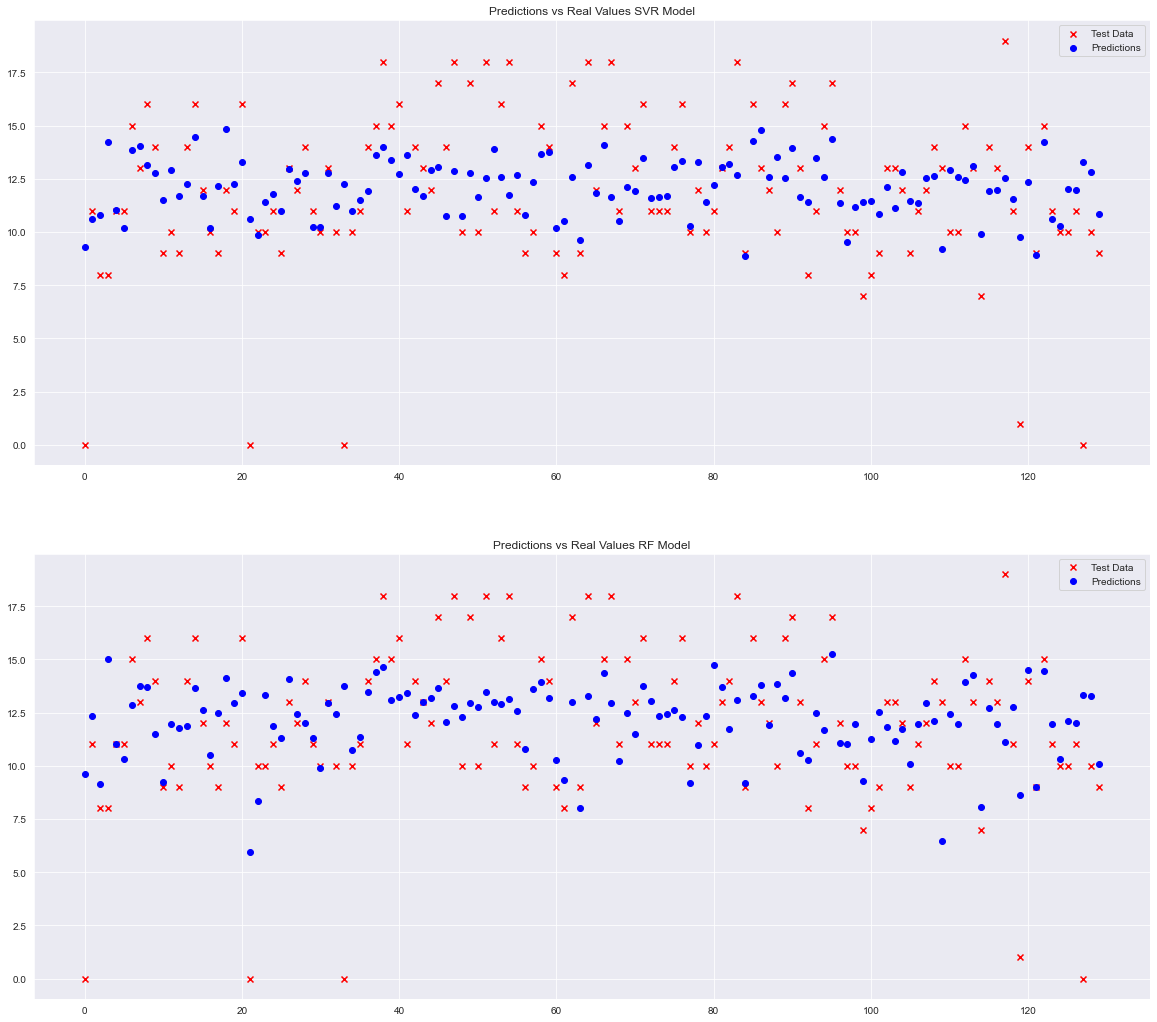

In [32]:
f, axes=plt.subplots(2,1, figsize=(20,18))

plt.subplot(2,1,1)
plt.scatter([i for i in range(len(y_test))], y_test, label='Test Data', marker='x' ,color='red')
plt.scatter([i for i in range(len(y_test))], y_pred['SVR'], label='Predictions', marker='o' ,color='blue')
plt.title('Predictions vs Real Values SVR Model')
plt.legend()

plt.subplot(2,1,2)
plt.scatter([i for i in range(len(y_test))], y_test, label='Test Data', marker='x' ,color='red')
plt.scatter([i for i in range(len(y_test))], y_pred['RF'], label='Predictions', marker='o' ,color='blue')
plt.title('Predictions vs Real Values RF Model')
plt.legend()

plt.show()

### As it follows from these plots both the models tend to give a prediction of G3 near to the mean value of the latter. As a consequence both models perform decently well to predict grades near to the mean value but they perform bad to predict the grades far from the latter, namely the grades of the best students and the grades of the worst ones. Moreover, the models tend to overestimate the grades under the mean value and to underestimate the grades over the mean value. 

In order to check the previous statement we may compute how many grades are underestimated and how many are overstimated. For the sake of simplicity we only work with the SVR: <br><br>
**For grades UNDER the mean value**

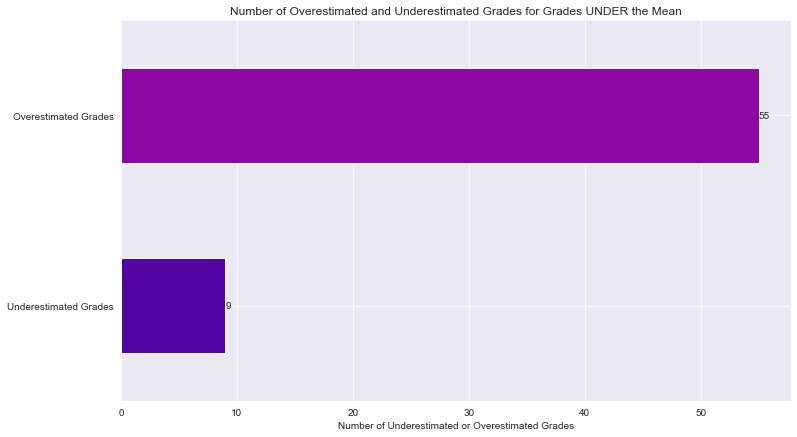

In [33]:
# delta is the array containing the difference between the real values and the predictions.
delta=y_test[y_test<y_test.mean()]-models['SVR'].predict(X_test[y_test<y_test.mean()])

plt.figure(figsize=(12,7))
ax=pd.Series({'Overestimated Grades': len(delta[delta<0]),
'Underestimated Grades': len(delta[delta>0])}).sort_values().plot(kind='barh',
title='Number of Overestimated and Underestimated Grades for Grades UNDER the Mean', color=sns.color_palette('plasma'))

for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('Number of Underestimated or Overestimated Grades')
plt.show()

**For grades OVER the mean value**

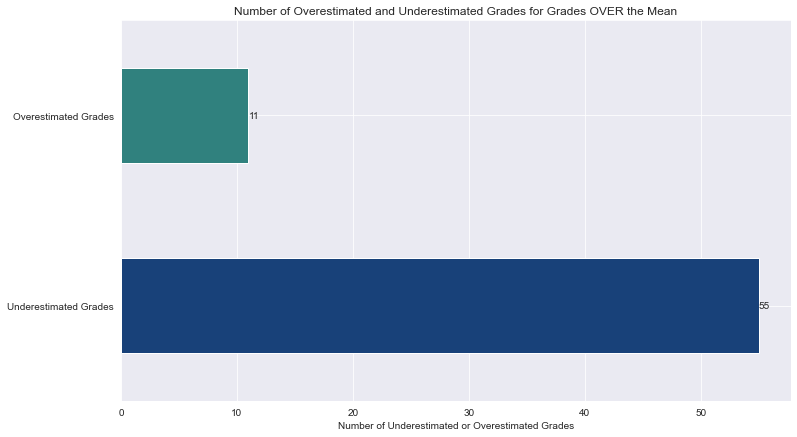

In [34]:
delta=y_test[y_test>y_test.mean()]-models['SVR'].predict(X_test[y_test>y_test.mean()])

plt.figure(figsize=(12,7))
ax=pd.Series({'Overestimated Grades': len(delta[delta<0]),
'Underestimated Grades': len(delta[delta>0])}).sort_values(ascending=False).plot(kind='barh',
title='Number of Overestimated and Underestimated Grades for Grades OVER the Mean', color=sns.color_palette('gist_earth'))

for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('Number of Underestimated or Overestimated Grades')
plt.show()

### These results clearly corroborate the previous statement. 

## Which Model Should We Choose Between SVR and RF?

The plot containing the MAEs associated with the different models shows that the best models are RF and SVR. Although the second one performs better than the first one, the two MAEs are really similar. How should we choose between them? To responde at this question we examinate the distribution of the errors made by these models. In particular, we do not consider the absolute values of the errors, but we keep the sign of the latter:

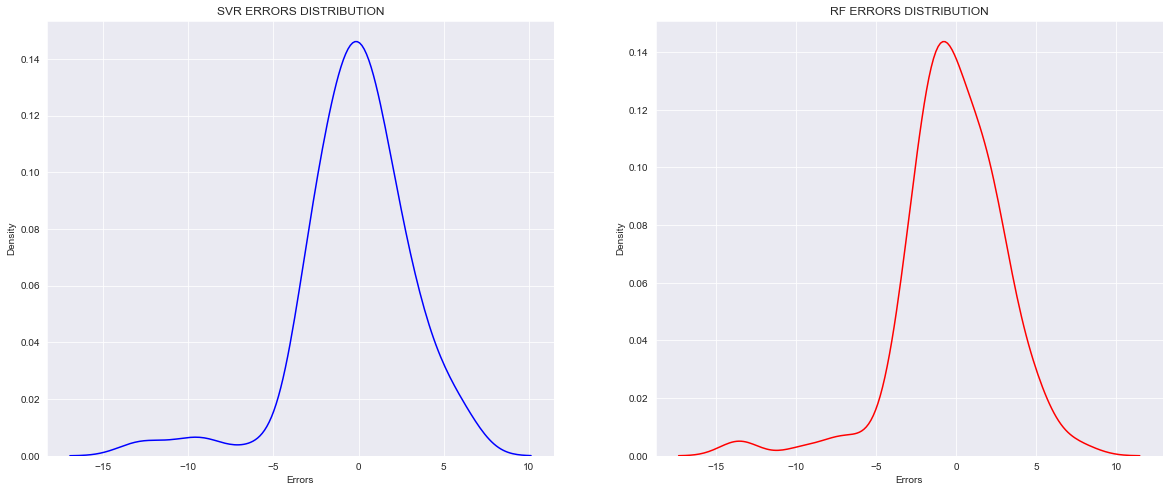

In [35]:
dist_errors={}
for model in models.keys():
    dist_errors[model]=(y_test-y_pred[model])
    
colors=['blue', 'red']

f, axes=plt.subplots(1,2,figsize=(20,8))

for i,model in enumerate(['SVR', 'RF']):
    sns.distplot(dist_errors[model], ax=axes[i], axlabel='Errors', color=colors[i], hist=False).set(
        title=model+' ERRORS DISTRIBUTION')
    
plt.show() 

### Both distributions are approximately bimodal gaussian distributions, with a negative main peak close to 0 and another one between -10 and -15. As it follows from these plots the SVR errors distribution is more symmetrical around the main peak and the latter is closer to 0, while the RF errors distribution has a secondary peak less wide. In other words, SVR tend to be more balanced in the ratio under/overestimated grades with respect to RF, while the RF performs better then SVR on the outliers. Hence, the choice between SVR and RF depends on what we prefer: having a more balanced model or a model which performs better on the outliers.

## Feature Importances

To conclude the analysis on the models let us see which are the most important features for the prediction of G3. **According to the EDA and the common sense we may say that the five most important features for the prediction are: 'studytime', 'higher', 'failures', 'goout' and 'Walc'**. However, by using the attribute feature_importances_ avaible for the Random Forest we get: 

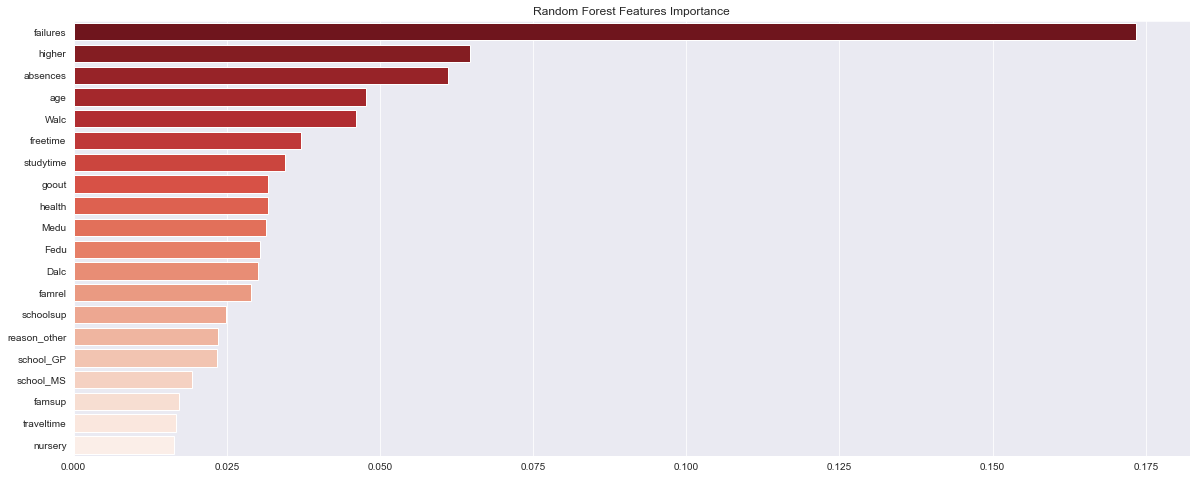

In [36]:
importance=pd.Series({pd.get_dummies(
    df.drop(['G3'], axis=1)).columns[i]:models['RF'].feature_importances_[i] for i in range(44)}
    ).sort_values(ascending=False)

# I only take the first 20 most important features
values=importance.values[:20]
index=importance.index[:20]

plt.figure(figsize=(20,8))
sns.barplot(y=index, x=values, palette='Reds_r')
plt.title('Random Forest Features Importance');

### Thus the Random Forest indicates 'failures', 'absences', 'higher', 'age',  and 'Walc' as the most important features for predicting the final grade G3. Thus, the Random Forest do not consider the 'studytime' and 'goout' as important as we might think for predicting the final grade G3 according both the common sense and the provided EDA. Conversely, the Random Forest considers as more important variables like 'absences' and 'age'. Especially for the first one it does not surprise us that it is considered important to the model. However we did not include the 'absences' variable into the 'most important variables' since we saw in the EDA that the relation between the number of absences and G3 is pretty irregular and the linear correlation between G3 and 'absences' is near to -0.1, which is quite low. It is also interesting to notice that for the model 'failures' is much more important than all the other variables for the prediction. 

# Conclusions 

### In conclusion:
### 1) The best models to predict the final grade G3 are Support Vector Regressor (SVR) and Random Forest (RF), and the latter have a mean absolute error (MAE) around 2.25 and 2.27 respectively. 
### 2) Both SVR and RF tend to predict the final grade around the mean value of the latter. Consequencially, both tend to underestimate the grades higher than the mean and to overestimate the grade lower than the mean.
### 3) By analysing the distribution of the errors made by both models it follows that SVR is 'more balanced', i.e. it has a better ratio between underestimated and overestimated grades, while RF performs better on the outliers. Thus, the choice between which model to use depends on the application needs.
### 4) According to the common sense and the provided EDA the most important features for the prediction of G3 should be 'studytime', 'higher', 'failures', 'goout' and 'Walc'. However, the RF indicates 'failures', 'absences', 'higher', 'age',  and 'Walc' as the most important features. This is not surprising, since also the variables which we have not considered as the most important clearly show an influence of the final grade as showed in the EDA. Moreover, according to RF the 'failures' variable is by far the most important one. 